In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import zipfile
import datetime
import os

# Upload data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
aisles= pd.read_csv('/content/gdrive/MyDrive/instacartdata/aisles.csv')
departments = pd.read_csv('/content/gdrive/MyDrive/instacartdata/departments.csv')
products= pd.read_csv('/content/gdrive/MyDrive/instacartdata/products.csv')
orders = pd.read_csv('/content/gdrive/MyDrive/instacartdata/orders.csv')
orders_products_prior = pd.read_csv('/content/gdrive/MyDrive/instacartdata/order_products__prior.csv')
orders_products_train = pd.read_csv('/content/gdrive/MyDrive/instacartdata/order_products__train.csv')
ss = pd.read_csv('/content/gdrive/MyDrive/instacartdata/sample_submission.csv')


# Read the data

In [ ]:
aisles= pd.read_csv('/content/gdrive/MyDrive/instacartdata/aisles.csv')
print(aisles)

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [ ]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [ ]:
aisles.duplicated().sum()

0

In [ ]:
departments = pd.read_csv('/content/gdrive/MyDrive/instacartdata/departments.csv')
print(departments)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [ ]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [ ]:
departments.duplicated().sum()

0

In [ ]:
products= pd.read_csv('/content/gdrive/MyDrive/instacartdata/products.csv')
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [ ]:
print("shape of products table:",products.shape)


shape of products table: (49688, 4)


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [ ]:
products.duplicated().sum()

0

In [ ]:
orders = pd.read_csv('/content/gdrive/MyDrive/instacartdata/orders.csv')
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
# replacing NAN with 0 value
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(value=0)
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
# converting data type
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(int)
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28
5,3367565,1,prior,6,2,7,19
6,550135,1,prior,7,1,9,20
7,3108588,1,prior,8,1,14,14
8,2295261,1,prior,9,1,16,0
9,2550362,1,prior,10,4,8,30


In [ ]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders_products_prior = pd.read_csv('/content/gdrive/MyDrive/instacartdata/order_products__prior.csv')
orders_products_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [ ]:
orders_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [ ]:
orders_products_prior.isnull().sum()


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
orders_products_prior.duplicated().sum()

0

In [ ]:
orders_products_train = pd.read_csv('/content/gdrive/MyDrive/instacartdata/order_products__train.csv')
orders_products_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
orders_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [ ]:
orders_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
orders_products_train.duplicated().sum()

0

In [ ]:
def reduce_mem_usage(train_data):
  #  iterate through all the columns of a dataframe and modify the data type to reduce memory usage."""
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train_data.columns:
        col_type = train_data[col].dtype

        if col_type != object:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')
        end_mem = train_data.memory_usage().sum() / 1024**2
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data


In [ ]:
reduce_mem_usage(orders_products_prior)
reduce_mem_usage(orders_products_train)
reduce_mem_usage(products)
reduce_mem_usage(orders)
reduce_mem_usage(departments)
reduce_mem_usage(aisles)

Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 866.09 MB
Decreased by 12.5%
Memory usage after optimization is: 742.37 MB
Decreased by 25.0%
Memory usage after optimization is: 556.78 MB
Decreased by 43.7%
Memory usage after optimization is: 340.25 MB
Decreased by 65.6%
Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 36.97 MB
Decreased by 12.5%
Memory usage after optimization is: 31.69 MB
Decreased by 25.0%
Memory usage after optimization is: 22.45 MB
Decreased by 46.9%
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%
Memory usage of dataframe is 1.52 MB
Memory usage after optimization is: 1.33 MB
Decreased by 12.5%
Memory usage after optimization is: 2.52 MB
Decreased by -66.5%
Memory usage after optimization is: 2.24 MB
Decreased by -47.7%
Memory usage after optimization is: 1.91 MB
Decreased by -25.8%
Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 169.66 MB
Decreased by 7.1%
Memory usage

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


# merge the data

In [ ]:
# concat train order and prior order
orders_prior_train = pd.concat([orders_products_prior, orders_products_train]).sort_values(by=['order_id'])
orders_prior_train.shape
orders_prior_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
1,1,11109,2,1
0,2,33120,1,1
1,2,28985,2,1


In [ ]:
# rest of merge
final_df= pd.merge(left= orders_prior_train, right= products,
                    left_on= 'product_id',right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
final_df.shape
final_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
2,1,13176,6,0,Bag of Organic Bananas,24,4
3,1,47209,7,0,Organic Hass Avocado,24,4
4,1,22035,8,1,Organic Whole String Cheese,21,16
5,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
6,1,10246,3,0,Organic Celery Hearts,83,4
7,1,49683,4,0,Cucumber Kirby,83,4
8,2,17794,6,1,Carrots,83,4
9,2,9327,3,0,Garlic Powder,104,13


In [ ]:
final_df= pd.merge(left= final_df, right= aisles,
                    left_on= 'aisle_id',right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
final_df.shape
final_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits
2,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese
3,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables
5,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables
6,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits
7,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood
8,2,33120,1,1,Organic Egg Whites,86,16,eggs
9,2,17794,6,1,Carrots,83,4,fresh vegetables


In [ ]:
final_df= pd.merge (left= final_df, right= departments,
                    left_on= 'department_id',right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

final_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
8,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
9,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce


In [ ]:
final_df = pd.merge(left= final_df, right= orders,
                    left_on= 'order_id',right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)
final_df.shape
final_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,train,4,4,10,9
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,train,4,4,10,9
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9
8,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8
9,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   product_id              int32   
 2   add_to_cart_order       int16   
 3   reordered               int8    
 4   product_name            category
 5   aisle_id                int16   
 6   department_id           int8    
 7   aisle                   category
 8   department              category
 9   user_id                 int32   
 10  eval_set                category
 11  order_number            int8    
 12  order_dow               int8    
 13  order_hour_of_day       int8    
 14  days_since_prior_order  int8    
dtypes: category(4), int16(2), int32(3), int8(6)
memory usage: 969.0 MB


In [ ]:
print(final_df.shape)

(33819106, 15)


#EDA

# Univariate analysis

In [ ]:
# checking the target variable
final_df['reordered'].value_counts()

1    19955360
0    13863746
Name: reordered, dtype: int64

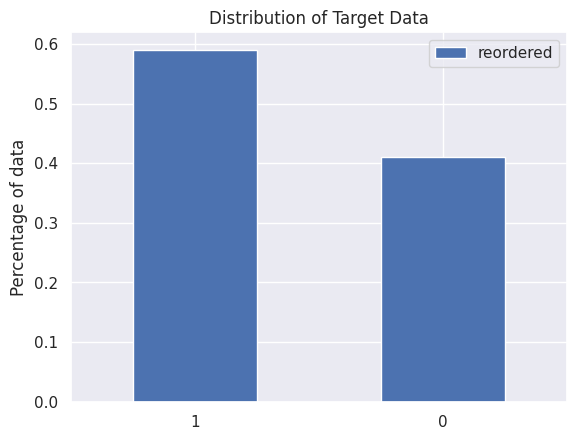

In [ ]:
# plot the target variable distribution
sns.set_theme()
ax = (final_df['reordered'].value_counts()/final_df.shape[0]).plot.bar()
ax.set_xticklabels(['1','0'], rotation = 0)  # convert it to first time orders and Reorders
ax.set_ylabel("Percentage of data")
ax.set_title('Distribution of Target Data')
ax.legend()

In [ ]:
prior_df = final_df[final_df['eval_set']=='prior']
train_df = final_df[final_df['eval_set']== 'train']

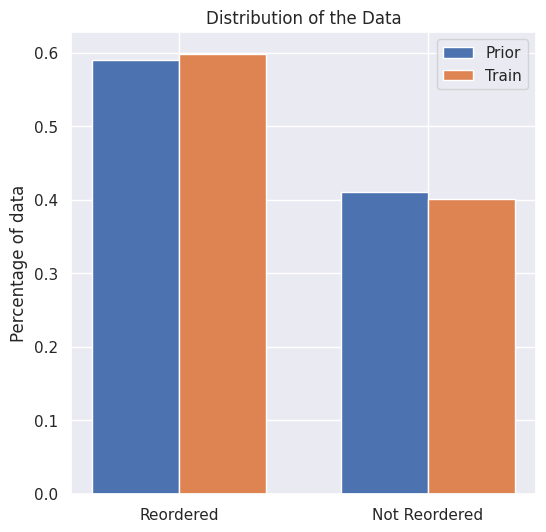

In [ ]:
#check the target distribution in train and prior set
prior_set = prior_df['reordered'].value_counts()/prior_df.shape[0]
train_set = train_df['reordered'].value_counts()/train_df.shape[0]

width = 0.35
x = np.array([0,1])
fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, prior_set, width, label='Prior')
rects2 = ax.bar(x + width/2, train_set, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of data')
ax.set_title('Distribution of the Data')
ax.set_xticks(x)
ax.set_xticklabels(['Reordered','Not Reordered'])
ax.legend()
plt.show()


From the above graph, we can see that the reordered percentage is almost same 60% for both train and prior set.

In [ ]:
# display orders with reordered items and no reordered items
orders_count = final_df.groupby(['order_id'])['reordered'].sum().reset_index(name = 'counts')

#order_with_reordered_items/ total unique orders
print('Orders with reordered items :',sum(orders_count['counts']!=0)/final_df['order_id'].nunique())
print('Orders with no reordered items :', sum(orders_count['counts']==0)/final_df['order_id'].nunique())

Orders with reordered items : 0.8813194412690899
Orders with no reordered items : 0.11868055873091014


Text(0.5, 1.0, 'Frequently ordered product')

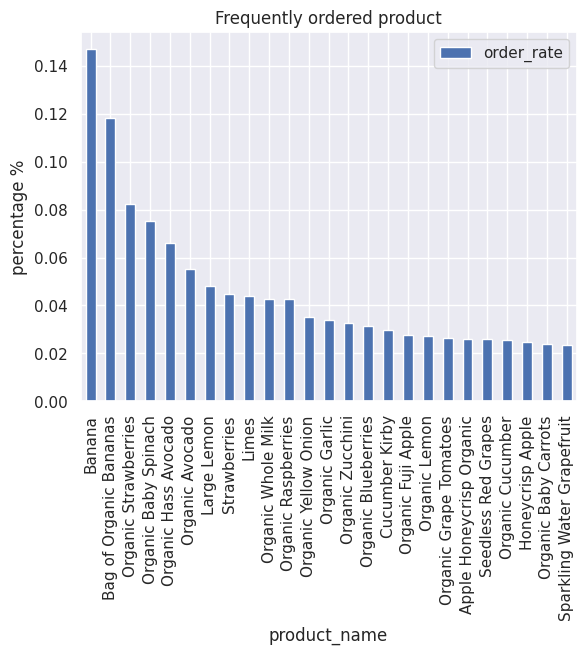

In [ ]:
df = final_df.groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'order_rate').sort_values(by ='order_rate', ascending = False)
df['order_rate'] = df['order_rate']/final_df['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

ax = df[:25].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently ordered product')

In [ ]:
# print least frequently ordered product by count

print("Least frequently ordered product ")
print("\n",final_df['product_name'].value_counts()[-10:])

Least frequently ordered product 

 Sugar Leaf  Stevia and Raw Cane Sugar              1
Flame Roasted Red Peppers Spreadable Cheese        1
Midnight Brownie Cookies                           1
Pantene Pro-V Color Preserve Volume Conditioner    1
Pure Squeezed  Lemonade                            1
Brut Prosecco                                      1
7.04 Oz. Grahamfuls Banana Vanilla 8ct             1
Unpeeled Apricot Halves in Heavy Syrup             0
Protein Granola Apple Crisp                        0
Single Barrel Kentucky Straight Bourbon Whiskey    0
Name: product_name, dtype: int64


In [ ]:
#plot aisles showing order_count and reorder rate

# Prepare Data
df = final_df.groupby(['aisle']).size().reset_index(name='order_count')
aisle_reorder_rate = final_df[final_df['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']


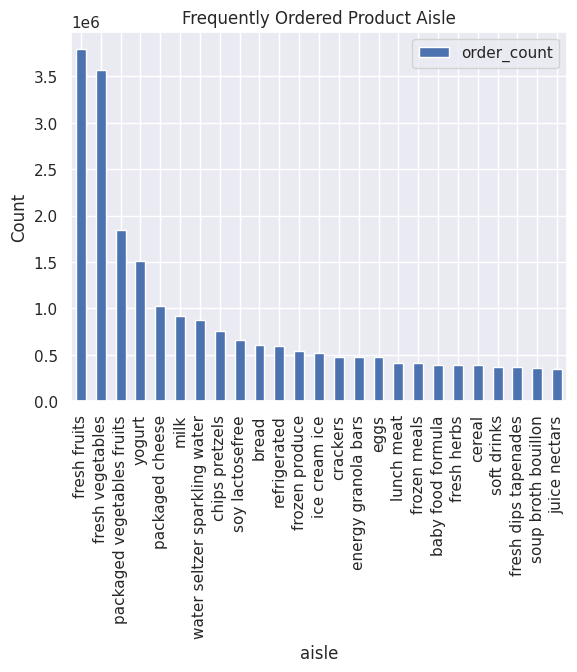

In [ ]:
#plot bar plot of top 25 aisles based on order count

ax = df[['aisle','order_count']].sort_values(by='order_count', ascending = False)[:25].plot.bar(x = 'aisle', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Aisle')
ax.legend()

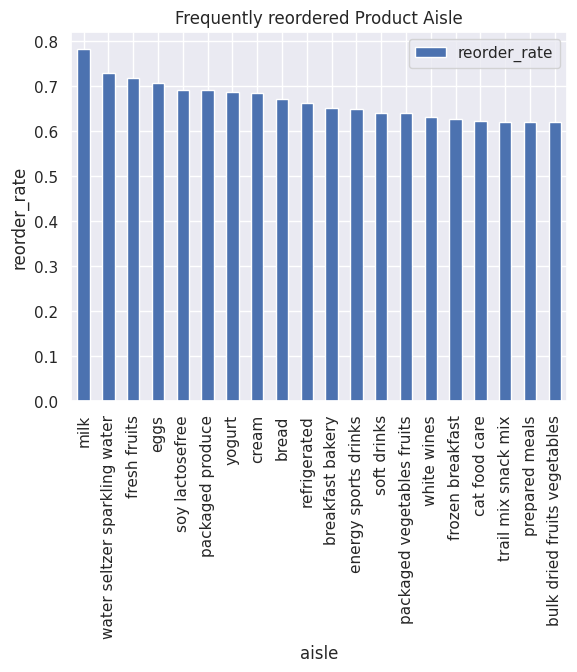

In [ ]:
#plot bar plot of top 20 aisles based on their reorder rate

ax = df[['aisle','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'aisle', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Aisle')
ax.legend()

In [ ]:
#get least frequently reordered product from each aisle

print("Least frequently reordered product aisles")
df[-10:]

Least frequently reordered product aisles


,aisle,order_count,reorder_rate
124,spreads,301502,0.487940
125,tea,258717,0.527619
126,tofu meat alternatives,134597,0.609471
127,tortillas flat bread,201650,0.551579
128,trail mix snack mix,37053,0.620867
129,trash bags liners,33702,0.336983
130,vitamins supplements,47028,0.312176
131,water seltzer sparkling water,878150,0.729930
132,white wines,31646,0.631928
133,yogurt,1507583,0.686501


In [ ]:
# get tree map of departments and display their order count and reorder rate

# Prepare Data
df = final_df.groupby(['department']).size().reset_index(name='order_count')
dept_reorder_rate = final_df[final_df['reordered']==1].groupby(['department']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = dept_reorder_rate['reorder_rate']/df['order_count']


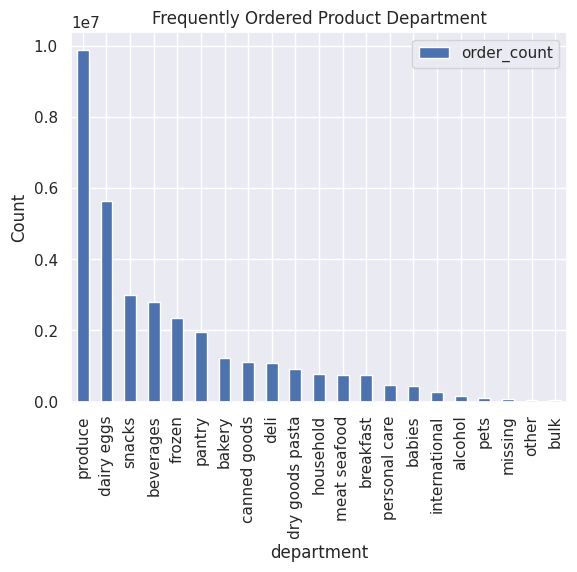

In [ ]:
# plot departments by their order rate

ax = df[['department','order_count']].sort_values(by='order_count', ascending = False).plot.bar(x = 'department', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Department')
ax.legend()

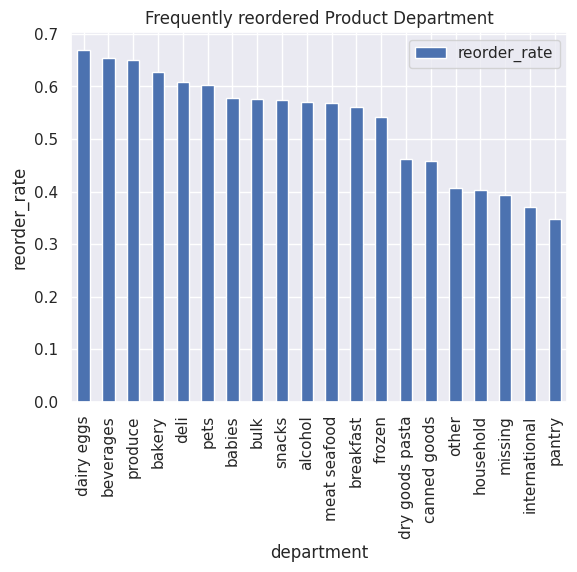

In [ ]:
#plot bar plot of top 20 Department based on their reorder rate

ax = df[['department','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'department', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Department')
ax.legend()

In [ ]:
#get least frequently reordered product from each department

print("Least frequently reordered product aisles")
df[-5:]

Least frequently reordered product aisles


,department,order_count,reorder_rate
16,pantry,1956819,0.347400
17,personal care,468693,0.321863
18,pets,102221,0.602557
19,produce,9888378,0.650521
20,snacks,3006412,0.574464


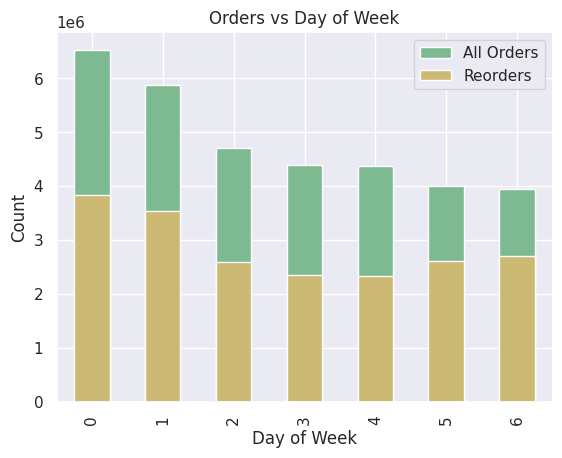

In [ ]:
# products that were ordered and reordered on a particular day of week

sns.set_theme(context='notebook', style='darkgrid', palette="crest")
ax = final_df['order_dow'].value_counts().plot.bar()
ax = final_df[final_df['reordered']==1].groupby(['order_dow']).size().plot.bar(color = 'y')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")
ax.set_title('Orders vs Day of Week')
ax.legend(["All Orders", "Reorders"])

From the graph above we can see that maximum number of orders is on Sunday, followed by monday. which makes sense as people will want to buy groceries either at the weekend or start of the week. Minimum orders are on thursday.




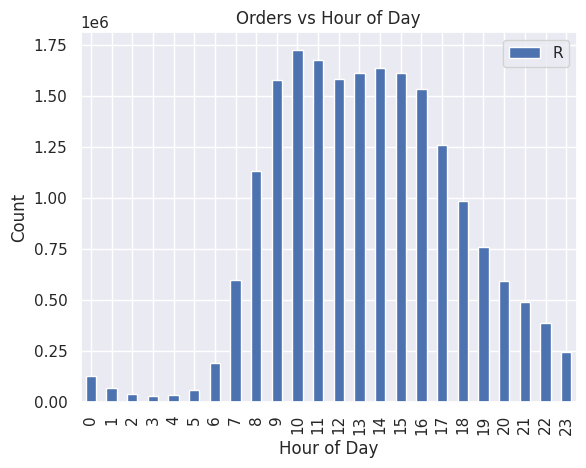

In [ ]:
# Checking the hour of the day the products are reordered the most
sns.set_theme(context='notebook', style='darkgrid')
#ax = final_df['order_hour_of_day'].value_counts().plot.bar()
ax = final_df[final_df['reordered']==1].groupby(['order_hour_of_day']).size().plot.bar(color = 'b')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title('Orders vs Hour of Day')
ax.legend("Reorder")

Maximum number of orders are in between 10-11 am or in evening 3-4pm. At night between 1-5am orders are the least.



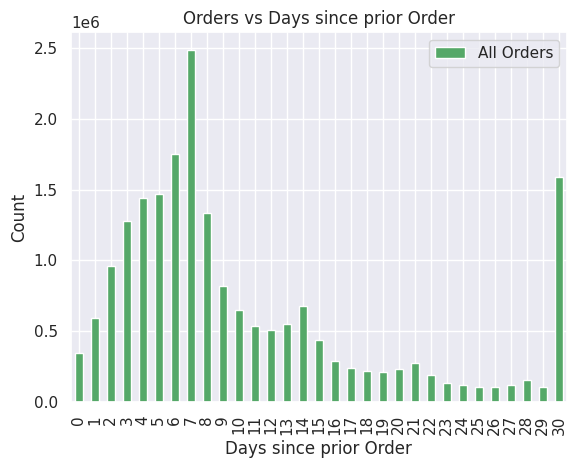

In [ ]:
# After how mamy days user reordered a product

sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
#ax = final_df['days_since_prior_order'].value_counts().plot.bar()
ax = final_df[final_df['reordered']==1].groupby(['days_since_prior_order']).size().plot.bar(color = 'g')
ax.set_xlabel("Days since prior Order")
ax.set_ylabel("Count")
ax.set_title('Orders vs Days since prior Order')
ax.legend(["All Orders", "Reorders"])

# Bivariate analysis

In [ ]:
order_day = final_df.groupby(['order_dow'])['order_id'].count().reset_index(name = 'count')
# products that were reordered per hour

reorder_day = final_df[final_df['reordered']==1].groupby(['order_dow','order_hour_of_day'])['order_id'].count().reset_index(name = 'reorder_rate')
reorder_day = pd.merge(reorder_day, order_day, on = 'order_dow', how = 'left')
reorder_day['reorder_rate'] = reorder_day['reorder_rate']/reorder_day['count']
reorder_day.drop('count', axis = 1, inplace = True)
reorder_day = reorder_day.pivot('order_dow','order_hour_of_day','reorder_rate')
reorder_day = pd.DataFrame(reorder_day.to_records())
reorder_day.set_index("order_dow", inplace = True)
reorder_day


<ipython-input-62-42ec904ef30e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  reorder_day = reorder_day.pivot('order_dow','order_hour_of_day','reorder_rate')


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,0.003569,0.002003,0.001152,0.000816,0.000734,0.001113,0.003477,0.013783,0.030964,0.043079,...,0.052577,0.051500,0.046587,0.036508,0.026347,0.020451,0.017612,0.015058,0.011650,0.006853
1,0.003876,0.001901,0.001056,0.000716,0.000806,0.001594,0.006162,0.019530,0.038739,0.057807,...,0.047370,0.045620,0.042959,0.034735,0.026416,0.020138,0.015485,0.012374,0.009331,0.005821
2,0.003996,0.001952,0.001122,0.000971,0.000924,0.001850,0.006600,0.018659,0.033406,0.048240,...,0.046363,0.046002,0.045726,0.037919,0.030994,0.023377,0.017665,0.014161,0.010909,0.007136
3,0.003951,0.001902,0.001238,0.000838,0.000988,0.001856,0.006713,0.018484,0.032076,0.044174,...,0.045376,0.047450,0.046031,0.039393,0.032025,0.024665,0.018410,0.015161,0.012387,0.007467
4,0.003636,0.001956,0.001167,0.000939,0.001064,0.001935,0.006760,0.019075,0.031919,0.043312,...,0.045854,0.046413,0.045973,0.039467,0.032050,0.025993,0.020395,0.017036,0.013853,0.008225
5,0.003866,0.002017,0.001265,0.001085,0.001246,0.002161,0.006926,0.019394,0.033038,0.046145,...,0.048975,0.048571,0.046317,0.037880,0.029896,0.022780,0.017518,0.014026,0.011095,0.007436
6,0.003895,0.002295,0.001408,0.000962,0.000999,0.001416,0.004487,0.016525,0.032950,0.042143,...,0.049617,0.047506,0.044149,0.036237,0.028780,0.021727,0.016806,0.014701,0.012001,0.008133


In [ ]:
from google.colab import files
reorder_day.to_csv('table.csv',index=False)
files.download('table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

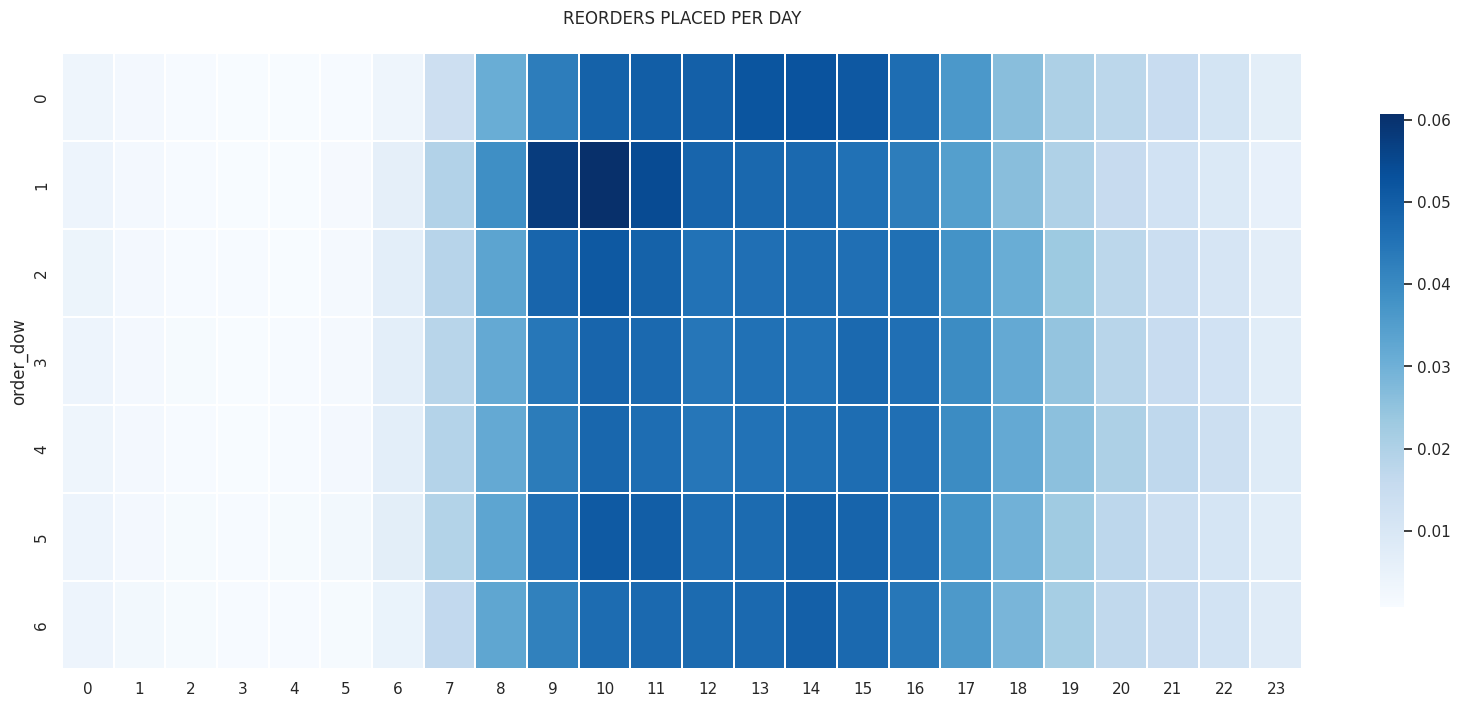

In [ ]:
##plot heatmap to visualize dense portions of orders in a time frame of 24x7

# figure
plt.figure(figsize=(20, 8))

# plot heatmap
sns.heatmap(reorder_day,cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})
# axis labels
plt.title('Reorders placed per day\n'.upper(), loc='center')

plt.show()

In [ ]:
# the most ordered products on any day or hour
x = final_df.groupby(['order_dow','order_hour_of_day','product_name'])['product_name'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'product_name')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
1,Bag of Organic Bananas,Banana,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
2,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
3,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Bag of Organic Bananas
4,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
5,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
6,Banana,Banana,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana


In [ ]:
# the most ordered aisles on any day or hour
x = final_df.groupby(['order_dow','order_hour_of_day','aisle'])['aisle'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'aisle')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,...,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
1,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
2,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
3,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
4,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables
5,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables
6,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,...,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables


In [ ]:
# the most ordered department on any day or hour
x = final_df.groupby(['order_dow','order_hour_of_day','department'])['department'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'department')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
1,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
2,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
3,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
4,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
5,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
6,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce


In [ ]:
final_df= pd.merge(left= final_df, right= orders,
                    left_on= 'order_id',right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)
final_df.shape
final_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id_x,...,order_number_x,order_dow_x,order_hour_of_day_x,days_since_prior_order_x,user_id_y,eval_set_y,order_number_y,order_dow_y,order_hour_of_day_y,days_since_prior_order_y
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,...,4,4,10,9,112108,train,4,4,10,9
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,...,4,4,10,9,112108,train,4,4,10,9
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,...,4,4,10,9,112108,train,4,4,10,9
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,...,4,4,10,9,112108,train,4,4,10,9
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,...,4,4,10,9,112108,train,4,4,10,9
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,...,4,4,10,9,112108,train,4,4,10,9
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,...,4,4,10,9,112108,train,4,4,10,9
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,...,4,4,10,9,112108,train,4,4,10,9
8,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,...,3,5,9,8,202279,prior,3,5,9,8
9,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,...,3,5,9,8,202279,prior,3,5,9,8


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 21 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   order_id                  int32   
 1   product_id                int32   
 2   add_to_cart_order         int16   
 3   reordered                 int8    
 4   product_name              category
 5   aisle_id                  int16   
 6   department_id             int8    
 7   aisle                     category
 8   department                category
 9   user_id_x                 int32   
 10  eval_set_x                category
 11  order_number_x            int8    
 12  order_dow_x               int8    
 13  order_hour_of_day_x       int8    
 14  days_since_prior_order_x  int8    
 15  user_id_y                 int32   
 16  eval_set_y                category
 17  order_number_y            int8    
 18  order_dow_y               int8    
 19  order_hour_of_day_y       int8    
 20  

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_df['aisle'] = le.fit_transform(final_df['aisle'].values)
final_df['department'] = le.fit_transform(final_df['department'].values)
final_df['product_name'] = le.fit_transform(final_df['product_name'].values)

In [ ]:
feature_col= ['order_id','product_id','add_to_cart_order','product_id','aisle_id','order_number_x','order_number_y','order_hour_of_day_x','order_hour_of_day_y','order_dow_y','order_dow_x','days_since_prior_order_y']
print(feature_col)

['order_id', 'product_id', 'add_to_cart_order', 'product_id', 'aisle_id', 'order_number_x', 'order_number_y', 'order_hour_of_day_x', 'order_hour_of_day_y', 'order_dow_y', 'order_dow_x', 'days_since_prior_order_y']


In [ ]:
x= final_df[feature_col]
y= final_df['reordered']

NameError: ignored

In [ ]:
# split the dataset into train and test set
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
print(x_train.head())

In [ ]:
# # Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)


In [ ]:
# # Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)


NameError: ignored